In [ ]:
# Titanic Survival Prediction Project
# Introduction
This project analyzes the Titanic dataset to predict passenger survival.
We use data cleaning, feature engineering, and machine learning models (Logistic Regression and Random Forest) to understand patterns in survival and make predictions.

In [ ]:
# Data Loading & Exploration
- Loaded dataset from GitHub using pandas.
- Checked the first rows with `head()` and the shape with `shape`.
- Identified missing values using `isnull().sum()`.
- Visualized survival distribution, passenger class distribution, and age distribution using seaborn plots.

In [2]:
# Load & quick EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [4]:
print("Shape:", df.shape)
display(df.head())

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


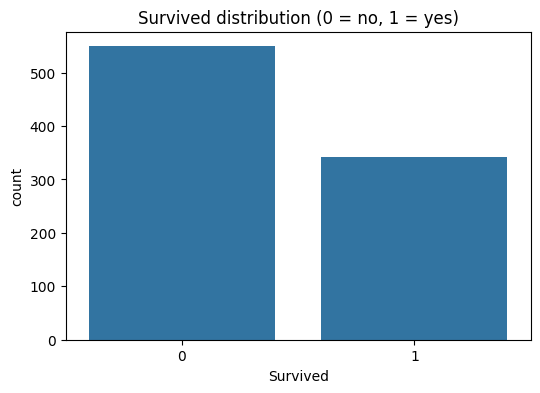

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survived distribution (0 = no, 1 = yes)")
plt.show()

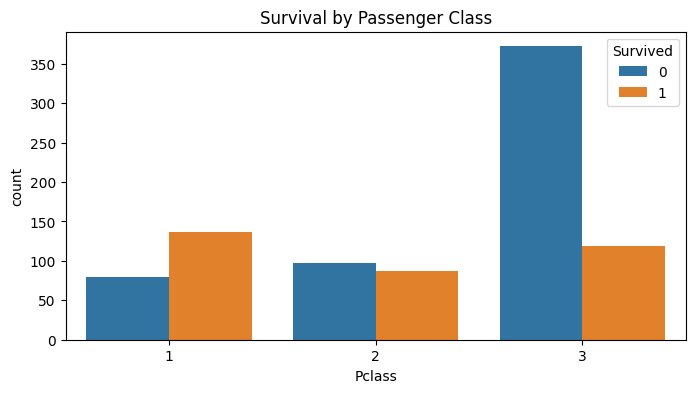

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

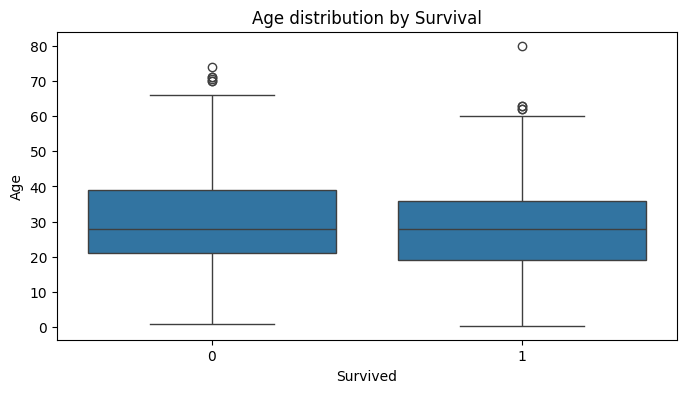

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age distribution by Survival")
plt.show()

In [ ]:
# Data Cleaning & Feature Engineering
- Filled missing 'Embarked' values with the most common port.
- Extracted 'Title' from passenger names (Mr, Mrs, Miss, Rare) to capture social status.
- Filled missing 'Age' values with median age grouped by 'Title'.
- Filled missing 'Fare' values with median fare.
- Created 'Deck' feature from 'Cabin', filling unknowns as 'U'.
- Added family features: 'FamilySize' and 'IsAlone' to capture social/family influence on survival.
- Dropped unused columns: 'PassengerId', 'Name', 'Ticket', 'Cabin'.
- Converted categorical variables into numerical values using one-hot encoding.
- Scaled numerical features (Age, Fare, FamilySize) for model efficiency.

In [9]:
# Fill missing Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [11]:
# Group rare titles
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

In [12]:
# Fill missing Age by Title median, then overall median
df['Age'] = df.groupby('Title')['Age'].transform(lambda grp: grp.fillna(grp.median()))
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
# Fill missing Fare
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [14]:
# Create Deck from Cabin
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', 'U')
df['Deck'] = df['Deck'].fillna('U')

In [15]:
# Family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [16]:
# Drop unused columns
df_clean = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [17]:
# One-hot encoding
df_clean = pd.get_dummies(df_clean, columns=['Sex','Embarked','Title','Deck'], drop_first=True)

In [18]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler
num_cols = ['Age','Fare','FamilySize']
scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
- Baseline model: Logistic Regression for quick evaluation (~82% accuracy).
- Stronger model: Random Forest, which can capture complex relationships (~84% accuracy with default parameters).
- Evaluated models using accuracy, confusion matrix, and classification report (precision, recall, F1-score).

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Initialize model
model = LogisticRegression(max_iter=1000)

In [22]:
# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Predict on test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296

Confusion Matrix:
 [[88 17]
 [15 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [1]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Create the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8379888268156425

Confusion Matrix:
 [[91 14]
 [15 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
# Model Tuning
- Used GridSearchCV to tune Random Forest hyperparameters (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features).
- Achieved improved accuracy with the best parameter combination.
- Evaluated tuned model to confirm improvements.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 8, 12],          # maximum depth of tree
    'min_samples_split': [2, 5, 10],        # min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['sqrt', 'log2']        # features to consider at split
}

In [29]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [32]:
print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
y_pred_tuned = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

Accuracy: 0.8379888268156425

Confusion Matrix:
 [[92 13]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [36]:
# Final Steps
- Visualized confusion matrix as a heatmap.
- Plotted feature importance to show which features influenced survival predictions the most.

SyntaxError: invalid syntax (ipython-input-1617076282.py, line 1)

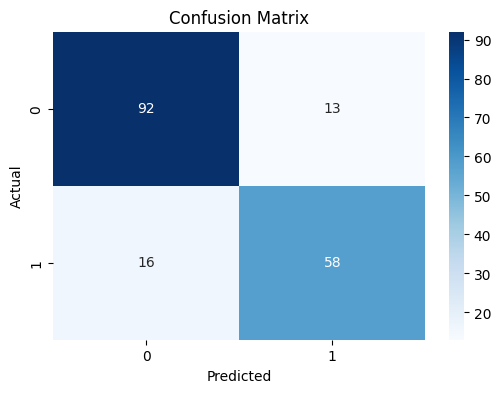

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

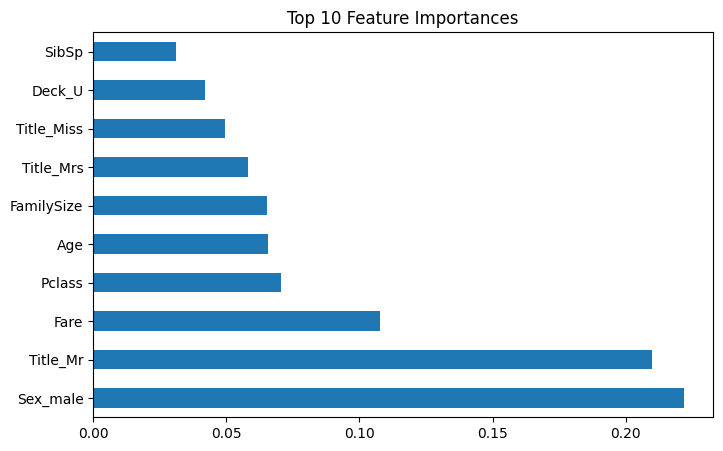

In [35]:
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances")
plt.show()